In [208]:
# 1. Import dataset
# 2. Convert to supervised-learning dataset
# 3. Train RNN
# 4. Predict
# 5. Evaluate

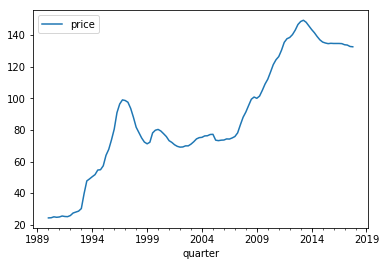

In [209]:
# 1. Import dataset

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../data/hdb-resale-price-index/housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv',
                 parse_dates=True, index_col=0)


df.rename(columns={'index': 'price'}, inplace=True)
df.head()

df.plot()
plt.show()

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 1990-01-01 to 2017-10-01
Data columns (total 1 columns):
price    112 non-null float64
dtypes: float64(1)
memory usage: 1.8 KB


In [211]:
# Signature: series_s.shift(periods=1, freq=None, axis=0)
# Docstring: Shift index by desired number of periods with an optional time freq

series = pd.DataFrame(df.price.values)

print(series.values.flatten()) # flatten to print nicely

# shift left
print()
print(series.shift(-1).values.flatten())

# shift right
print()
print(series.shift(1).values.flatten())

[ 24.3  24.4  25.   24.7  24.9  25.5  25.2  25.1  25.8  27.4  28.   28.6
  30.2  39.6  47.7  49.   50.4  51.7  54.6  54.8  57.3  63.9  67.7  73.7
  80.5  90.9  96.4  99.   98.6  97.5  93.6  88.   81.7  78.3  74.9  72.3
  71.2  72.2  78.1  79.8  80.3  79.3  77.6  75.8  73.2  72.1  70.6  69.6
  69.1  69.2  69.9  69.9  71.   72.5  74.3  75.1  75.3  76.2  76.3  77.1
  77.2  73.5  73.2  73.5  73.6  74.3  74.2  74.9  75.8  78.1  83.2  88.
  91.3  95.4  99.4 100.8 100.  101.4 105.  109.  112.1 116.6 121.3 124.4
 126.4 130.4 135.4 137.7 138.5 140.3 143.1 146.7 148.6 149.4 148.1 145.8
 143.5 141.5 139.1 137.  135.6 135.  134.6 134.8 134.7 134.7 134.7 134.6
 133.9 133.7 132.8 132.6]

[ 24.4  25.   24.7  24.9  25.5  25.2  25.1  25.8  27.4  28.   28.6  30.2
  39.6  47.7  49.   50.4  51.7  54.6  54.8  57.3  63.9  67.7  73.7  80.5
  90.9  96.4  99.   98.6  97.5  93.6  88.   81.7  78.3  74.9  72.3  71.2
  72.2  78.1  79.8  80.3  79.3  77.6  75.8  73.2  72.1  70.6  69.6  69.1
  69.2  69.9  69.9  71.  

In [322]:
# 2. Convert to supervised-learning dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# window
window_size = 10 # 10 quarters

series = pd.DataFrame(df.price.values)
series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis=1)
    
# drop last few rows
series.dropna(inplace=True)
series

,0,0,0,0,0,0,0,0,0,0,0
0,24.3,24.4,25.0,24.7,24.9,25.5,25.2,25.1,25.8,27.4,28.0
1,24.4,25.0,24.7,24.9,25.5,25.2,25.1,25.8,27.4,28.0,28.6
2,25.0,24.7,24.9,25.5,25.2,25.1,25.8,27.4,28.0,28.6,30.2
3,24.7,24.9,25.5,25.2,25.1,25.8,27.4,28.0,28.6,30.2,39.6
4,24.9,25.5,25.2,25.1,25.8,27.4,28.0,28.6,30.2,39.6,47.7
5,25.5,25.2,25.1,25.8,27.4,28.0,28.6,30.2,39.6,47.7,49.0
6,25.2,25.1,25.8,27.4,28.0,28.6,30.2,39.6,47.7,49.0,50.4
7,25.1,25.8,27.4,28.0,28.6,30.2,39.6,47.7,49.0,50.4,51.7
8,25.8,27.4,28.0,28.6,30.2,39.6,47.7,49.0,50.4,51.7,54.6
9,27.4,28.0,28.6,30.2,39.6,47.7,49.0,50.4,51.7,54.6,54.8


In [253]:
# scale (Note: don't need to split beforehand for time series)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

# train test split (Note: shuffle actually doesn't matter)
train, test = train_test_split(series_scaled, shuffle=False)

print(train)
print('training set shape', train.shape)
print('test set shape', test.shape)

[[0.00000000e+00 0.00000000e+00 2.40577386e-03 0.00000000e+00
  0.00000000e+00 3.21802092e-03 8.04505229e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.99360512e-04 4.80000000e-03 0.00000000e+00 1.60384924e-03
  4.81927711e-03 8.04505229e-04 0.00000000e+00 5.63153660e-03
  1.29449838e-02 4.91803279e-03 4.94233937e-03]
 [5.59552358e-03 2.40000000e-03 1.60384924e-03 6.41539695e-03
  2.40963855e-03 0.00000000e+00 5.63153660e-03 1.85036203e-02
  1.77993528e-02 9.83606557e-03 1.81219110e-02]
 [3.19744205e-03 4.00000000e-03 6.41539695e-03 4.00962310e-03
  1.60642570e-03 5.63153660e-03 1.85036203e-02 2.33306516e-02
  2.26537217e-02 2.29508197e-02 9.55518946e-02]
 [4.79616307e-03 8.80000000e-03 4.00962310e-03 3.20769848e-03
  7.22891566e-03 1.85036203e-02 2.33306516e-02 2.81576830e-02
  3.55987055e-02 1.00000000e-01 1.62273476e-01]
 [9.59232614e-03 6.40000000e-03 3.20769848e-03 8.82117081e-03
  2.00803213e-02 2.33306516e-02 2.81576830e-02 4.10297667e-02
  1.11650485e-01

In [254]:
train.shape

(76, 11)

In [255]:
# select first 10 columns => X
# select last column => y (next value we want to predict/forecast)
train_X = train[:, :-1]
train_y = train[:, -1]

print(train_X.shape)
print(train_y.shape)

(76, 10)
(76,)


In [256]:
test_X = test[:, :-1]
test_y = test[:, -1]

print(test_X.shape)
print(test_y.shape)

(26, 10)
(26,)


In [257]:
# RNN requires: num_samples, num_features (50), num_time_steps (1) (TODO:check)
train_X_rnn = np.expand_dims(train_X, 2)
test_X_rnn = np.expand_dims(test_X, 2)

print('training set shape', train_X_rnn.shape)
print('test set shape', test_X_rnn.shape)

training set shape (76, 10, 1)
test set shape (26, 10, 1)


In [349]:
# 4 * output_size * (input_size + bias + output_size)
4 * 10 * (1 + 1 + 10)

480

In [338]:
# 4 * lstm_hidden_state_size * (lstm_inputs_size + bias_variable + lstm_outputs_size) 

4 * 256 * (10 + 1 + 256)

273408

In [354]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation

timestep_size = 1

model = Sequential()
# model.add(LSTM(input_shape=(10, 1),
#                units=10, return_sequences=True))

model.add(LSTM(input_shape=(window_size, timestep_size),
               units=window_size, return_sequences=True))
model.add(Dropout(0.5)) # avoid overfit
model.add(LSTM(256))
model.add(Dropout(0.5)) # avoid overfit
model.add(Dense(1))
model.add(Activation("linear"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 10, 10)            480       
_________________________________________________________________
dropout_41 (Dropout)         (None, 10, 10)            0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 256)               273408    
_________________________________________________________________
dropout_42 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 257       
_________________________________________________________________
activation_21 (Activation)   (None, 1)                 0         
Total params: 274,145
Trainable params: 274,145
Non-trainable params: 0
_________________________________________________________________


In [351]:
# model.add(LSTM(units=256, input_dim=4096, input_length=16))
# [(256 + 4096 + 1) * 256] * 4 = 4457472

#model.add(LSTM(input_shape=(window_size, timestep_size),
#               units=window_size, return_sequences=True))
# ((window_size + window_size * timestep_size + 1) * window_size) * 4

In [352]:
from keras.callbacks import TensorBoard, EarlyStopping
import time

model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

tensorboard = TensorBoard(log_dir='./logs/timeseries/%d' % time.time())
earlystopping = EarlyStopping(patience=10)

model.fit(train_X_rnn, train_y,
          batch_size=16,
          epochs=10,
          validation_data=(test_X_rnn, test_y),
          callbacks=[tensorboard, earlystopping])

ValueError: Error when checking input: expected lstm_28_input to have shape (1, 10) but got array with shape (10, 1)

In [309]:
# predict the future resale price
import numpy as np
latest_prices_scaled = test_X[-1]
print(latest_prices_scaled)

prediction = model.predict(latest_prices_scaled.reshape(1, -1, 1))
print(prediction)

scaled_values = np.append(latest_prices_scaled, prediction[0][0])
values = scaler.inverse_transform(scaled_values.reshape(1, -1)).flatten()
print(values)

[0.88489209 0.8816     0.88291901 0.88211708 0.88192771 0.88173773
 0.88093323 0.87530169 0.87297735 0.86393443]
[[0.6032263]]
[135.         134.6        134.8        134.7        134.7
 134.7        134.6        133.9        133.7        132.8
 101.23167331]


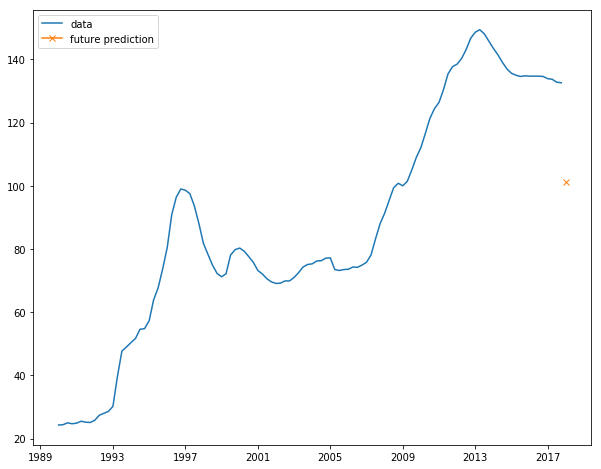

In [310]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df, label='data')
ax.plot(pd.to_datetime('2018-01-01'), values[-1], marker='x', label='future prediction')
ax.legend()

plt.show()

In [289]:
df.index

DatetimeIndex(['1990-01-01', '1990-04-01', '1990-07-01', '1990-10-01',
               '1991-01-01', '1991-04-01', '1991-07-01', '1991-10-01',
               '1992-01-01', '1992-04-01',
               ...
               '2015-07-01', '2015-10-01', '2016-01-01', '2016-04-01',
               '2016-07-01', '2016-10-01', '2017-01-01', '2017-04-01',
               '2017-07-01', '2017-10-01'],
              dtype='datetime64[ns]', name='quarter', length=112, freq=None)

In [303]:
from keras.layers import GRU

timestep_size = 1

model_gru = Sequential()
model_gru.add(GRU(input_shape=(window_size, timestep_size),
               units=window_size, return_sequences=True))
model_gru.add(Dropout(0.5))
model_gru.add(GRU(256))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(1))
model_gru.add(Activation("linear"))
model_gru.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_9 (GRU)                  (None, 10, 10)            360       
_________________________________________________________________
dropout_33 (Dropout)         (None, 10, 10)            0         
_________________________________________________________________
gru_10 (GRU)                 (None, 256)               205056    
_________________________________________________________________
dropout_34 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
_________________________________________________________________
activation_17 (Activation)   (None, 1)                 0         
Total params: 205,673
Trainable params: 205,673
Non-trainable params: 0
_________________________________________________________________


In [304]:
model_gru.compile(loss="mse", optimizer="adam")

tensorboard = TensorBoard(log_dir='./logs/timeseries_gru/%d' % time.time())
earlystopping = EarlyStopping()

model_gru.fit(train_X_rnn, train_y,
          batch_size=16,
          epochs=3,
          validation_data=(test_X_rnn, test_y),
          callbacks=[tensorboard, earlystopping])

Train on 76 samples, validate on 26 samples
Epoch 1/3
76/76 [==============================] - 2s 26ms/step - loss: 0.1293 - val_loss: 0.0938
Epoch 2/3
76/76 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0133
Epoch 3/3
76/76 [==============================] - 0s 3ms/step - loss: 0.0224 - val_loss: 0.0555


[[0.6667628]]
[135.         134.6        134.8        134.7        134.7
 134.7        134.6        133.9        133.7        132.8
 108.94500742]


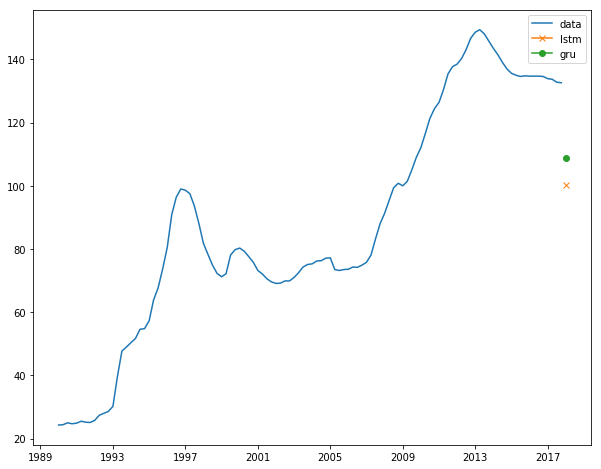

In [306]:
# predict the future resale price
prediction = model_gru.predict(latest_prices_scaled.reshape(1, -1, 1))
print(prediction)

scaled_values = np.append(latest_prices_scaled, prediction[0][0])
values_gru = scaler.inverse_transform(scaled_values.reshape(1, -1)).flatten()
print(values_gru)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df, label='data')
ax.plot(pd.to_datetime('2018-01-01'), values[-1], marker='x', label='lstm')
ax.plot(pd.to_datetime('2018-01-01'), values_gru[-1], marker='o', label='gru')
ax.legend()
plt.show()